In [1]:
using LinearAlgebra, Distributions

In [2]:
using Plots 

In [109]:
#注 endで閉じる
n=10
for i=(n-1):-1:1
    println(i)
end

9
8
7
6
5
4
3
2
1


## β-Hermite ensembles

* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.308.6290&rep=rep1&type=pdf
<img src="hermite.png" width=50%>

In [4]:
T(n,β)=SymTridiagonal(rand(Normal(0,√(2β)),n),[rand(Chi(i*β)) for i=(n-1):-1:1])

T (generic function with 1 method)

In [5]:
# example：real case(β=1)
T(10,1)

10×10 SymTridiagonal{Float64,Array{Float64,1}}:
 0.840629   2.89577     ⋅        ⋅        …    ⋅         ⋅         ⋅ 
 2.89577   -0.461222   3.29397   ⋅             ⋅         ⋅         ⋅ 
  ⋅         3.29397   -1.4603   3.18298        ⋅         ⋅         ⋅ 
  ⋅          ⋅         3.18298  0.974621       ⋅         ⋅         ⋅ 
  ⋅          ⋅          ⋅       1.47758        ⋅         ⋅         ⋅ 
  ⋅          ⋅          ⋅        ⋅        …    ⋅         ⋅         ⋅ 
  ⋅          ⋅          ⋅        ⋅            0.997967   ⋅         ⋅ 
  ⋅          ⋅          ⋅        ⋅           -1.76115   1.63973    ⋅ 
  ⋅          ⋅          ⋅        ⋅            1.63973   0.267094  0.818884
  ⋅          ⋅          ⋅        ⋅             ⋅        0.818884  0.00470878

In [6]:
n=1000;β=1;
@time F=eigen(T(n,β)/√(β*n))
list=F.values;

  0.486452 seconds (546.70 k allocations: 35.918 MiB, 3.31% gc time)


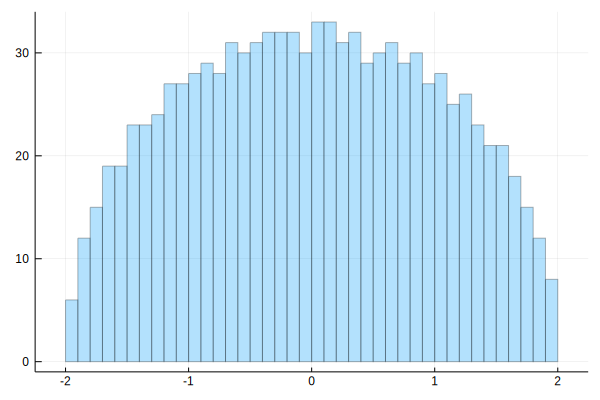

In [7]:
plot(size=(600, 320))
histogram(list,legend=false,norm=false,alpha=0.3,bin=-2:0.1:2)

In [11]:
@which eigen(T(n, β)/√(n*β))

eigen(A::SymTridiagonal{T,V} where V<:AbstractArray{T,1}) where T in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/tridiag.jl:280

## β-Laguerre ensembles

<img src="laguerre.png" width=50%>

In [3]:
B(n,m,β)=Bidiagonal([rand(Chi(i*β)) for i=n:-1:(n-m+1)],[rand(Chi(i*β)) for i=m-1:-1:1],:L)

B (generic function with 1 method)

In [116]:
# n*m 
n=9747
m=2000
β=1;
X=B(n,m,β);
X=Array(X)

2000×2000 Array{Float64,2}:
 98.8379   0.0      0.0      0.0      0.0     …   0.0       0.0        0.0
 45.3565  99.5386   0.0      0.0      0.0         0.0       0.0        0.0
  0.0     44.2388  99.208    0.0      0.0         0.0       0.0        0.0
  0.0      0.0     44.8901  99.0897   0.0         0.0       0.0        0.0
  0.0      0.0      0.0     43.935   98.6559      0.0       0.0        0.0
  0.0      0.0      0.0      0.0     45.0104  …   0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0     …   0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0

In [124]:
W=Transpose(X)*X
@time list1=eigen(W).values;

  2.377612 seconds (16 allocations: 92.271 MiB)


In [118]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1.0;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

<img src="mp-law.png" width=50%>

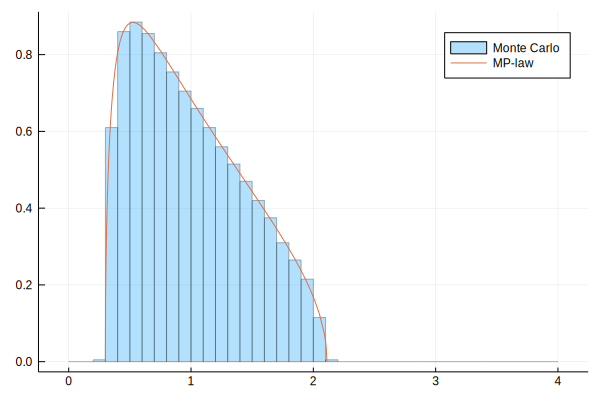

In [128]:
#ゲノム解析のパラメータ n=9747(genes);m=2000(cells) 
histogram(list1/(β*n),norm=true,alpha=0.3,bin=0:0.1:4,lab="Monte Carlo")
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b,lab="MP-law";)

In [123]:
@time list=svd(X).S;

  5.081107 seconds (13 allocations: 183.350 MiB, 0.42% gc time)


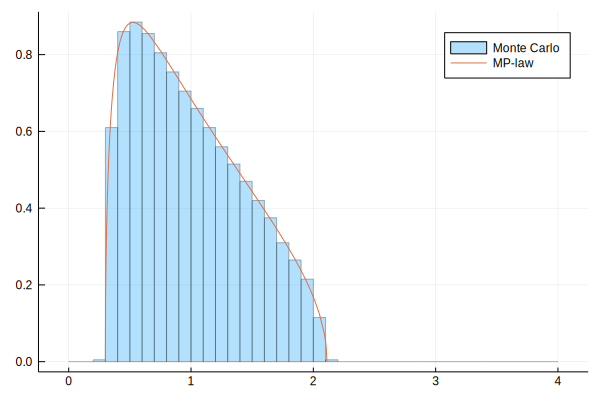

In [126]:
histogram(list.^2/(β*n),norm=true,alpha=0.3,bin=0:0.1:4,lab="Monte Carlo")
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b,lab="MP-law";)

## 課題1

In [5]:
list=[]
size=10^6;
β=1;
n=100;
@time for i=1:size
    append!(list,tr(T(n,β)))
end
mean(list)

  8.956619 seconds (9.71 M allocations: 2.667 GiB, 6.68% gc time)


-0.004141441220094594